In [57]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
MY_BOUNDED_SET = 4

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [59]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [60]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [61]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(4, 3) (4, 3) (0, 3) (0, 3)


In [62]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []
pred_list = []

In [63]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [64]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       [0.082776 , 0.740335 , 0.365109 ]], dtype=float32)

In [65]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [66]:
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_9/BiasAdd:0' shape=(4, 3) dtype=float32>

In [67]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(cost)

In [68]:
session.run(tf.global_variables_initializer())

In [69]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [70]:
print (y_true.shape)

(?, 3)


In [71]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    global pred_list
    #global pred1,pred2,pred3
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:X_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]
        pred_list += [session.run(output_layer,feed_dict=feed_dict_train)]

In [72]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [55]:
train(N_EPOCHS)
#predict()
#output_layer

[1]
Train Accuracy :  4.473761e-06
[2]
Train Accuracy :  4.824532e-06
[3]
Train Accuracy :  4.3255745e-06
[4]
Train Accuracy :  4.9419054e-06
[5]
Train Accuracy :  4.439492e-06
[6]
Train Accuracy :  4.842248e-06
[7]
Train Accuracy :  4.3464192e-06
[8]
Train Accuracy :  4.896421e-06
[9]
Train Accuracy :  4.4034377e-06
[10]
Train Accuracy :  4.8421407e-06
[11]
Train Accuracy :  4.3670075e-06
[12]
Train Accuracy :  4.880133e-06
[13]
Train Accuracy :  4.3807813e-06
[14]
Train Accuracy :  4.862255e-06
[15]
Train Accuracy :  4.377486e-06
[16]
Train Accuracy :  4.8582615e-06
[17]
Train Accuracy :  4.3648092e-06
[18]
Train Accuracy :  4.8511183e-06
[19]
Train Accuracy :  4.372652e-06
[20]
Train Accuracy :  4.8473794e-06
[21]
Train Accuracy :  4.3400073e-06
[22]
Train Accuracy :  4.858819e-06
[23]
Train Accuracy :  4.3804525e-06
[24]
Train Accuracy :  4.813997e-06
[25]
Train Accuracy :  4.315881e-06
[26]
Train Accuracy :  4.865926e-06
[27]
Train Accuracy :  4.4076014e-06
[28]
Train Accuracy :  

[395]
Train Accuracy :  4.994021e-06
[396]
Train Accuracy :  4.4142002e-06
[397]
Train Accuracy :  5.9806584e-06
[398]
Train Accuracy :  5.43918e-06
[399]
Train Accuracy :  4.9594046e-06
[400]
Train Accuracy :  4.3817627e-06
[401]
Train Accuracy :  5.991477e-06
[402]
Train Accuracy :  5.455793e-06
[403]
Train Accuracy :  4.96239e-06
[404]
Train Accuracy :  4.3854616e-06
[405]
Train Accuracy :  5.953254e-06
[406]
Train Accuracy :  5.396372e-06
[407]
Train Accuracy :  4.9995274e-06
[408]
Train Accuracy :  4.472919e-06
[409]
Train Accuracy :  5.900655e-06
[410]
Train Accuracy :  5.2799396e-06
[411]
Train Accuracy :  5.04682e-06
[412]
Train Accuracy :  4.565549e-06
[413]
Train Accuracy :  5.7621105e-06
[414]
Train Accuracy :  5.213122e-06
[415]
Train Accuracy :  5.1347934e-06
[416]
Train Accuracy :  4.5955658e-06
[417]
Train Accuracy :  5.712092e-06
[418]
Train Accuracy :  5.136283e-06
[419]
Train Accuracy :  5.1969896e-06
[420]
Train Accuracy :  4.652603e-06
[421]
Train Accuracy :  5.6105

[773]
Train Accuracy :  4.8651864e-06
[774]
Train Accuracy :  4.4139842e-06
[775]
Train Accuracy :  4.9533073e-06
[776]
Train Accuracy :  4.4732164e-06
[777]
Train Accuracy :  4.8377474e-06
[778]
Train Accuracy :  4.3954765e-06
[779]
Train Accuracy :  4.943737e-06
[780]
Train Accuracy :  4.4643994e-06
[781]
Train Accuracy :  4.8547636e-06
[782]
Train Accuracy :  4.3912382e-06
[783]
Train Accuracy :  4.908211e-06
[784]
Train Accuracy :  4.4444982e-06
[785]
Train Accuracy :  4.8435318e-06
[786]
Train Accuracy :  4.4076246e-06
[787]
Train Accuracy :  4.910957e-06
[788]
Train Accuracy :  4.441647e-06
[789]
Train Accuracy :  4.8444467e-06
[790]
Train Accuracy :  4.395453e-06
[791]
Train Accuracy :  4.9020887e-06
[792]
Train Accuracy :  4.450027e-06
[793]
Train Accuracy :  4.847757e-06
[794]
Train Accuracy :  4.3964706e-06
[795]
Train Accuracy :  4.9246605e-06
[796]
Train Accuracy :  4.4471967e-06
[797]
Train Accuracy :  4.8197735e-06
[798]
Train Accuracy :  4.3897526e-06
[799]
Train Accurac

[1118]
Train Accuracy :  4.041715e-06
[1119]
Train Accuracy :  4.781631e-06
[1120]
Train Accuracy :  4.30141e-06
[1121]
Train Accuracy :  4.525802e-06
[1122]
Train Accuracy :  4.049388e-06
[1123]
Train Accuracy :  4.777367e-06
[1124]
Train Accuracy :  4.315002e-06
[1125]
Train Accuracy :  4.5192455e-06
[1126]
Train Accuracy :  4.0676473e-06
[1127]
Train Accuracy :  4.7271756e-06
[1128]
Train Accuracy :  4.3007913e-06
[1129]
Train Accuracy :  4.528099e-06
[1130]
Train Accuracy :  4.0308514e-06
[1131]
Train Accuracy :  4.8089646e-06
[1132]
Train Accuracy :  4.3836594e-06
[1133]
Train Accuracy :  4.482457e-06
[1134]
Train Accuracy :  4.0194955e-06
[1135]
Train Accuracy :  4.858981e-06
[1136]
Train Accuracy :  4.439505e-06
[1137]
Train Accuracy :  4.3931946e-06
[1138]
Train Accuracy :  3.9489773e-06
[1139]
Train Accuracy :  4.9225155e-06
[1140]
Train Accuracy :  4.4919407e-06
[1141]
Train Accuracy :  4.284331e-06
[1142]
Train Accuracy :  3.787098e-06
[1143]
Train Accuracy :  5.0947583e-06


[1505]
Train Accuracy :  4.7305657e-06
[1506]
Train Accuracy :  4.2550178e-06
[1507]
Train Accuracy :  4.8002626e-06
[1508]
Train Accuracy :  4.3054333e-06
[1509]
Train Accuracy :  4.743384e-06
[1510]
Train Accuracy :  4.2804445e-06
[1511]
Train Accuracy :  4.7572653e-06
[1512]
Train Accuracy :  4.2787883e-06
[1513]
Train Accuracy :  4.7530375e-06
[1514]
Train Accuracy :  4.28437e-06
[1515]
Train Accuracy :  4.726383e-06
[1516]
Train Accuracy :  4.231756e-06
[1517]
Train Accuracy :  4.7790186e-06
[1518]
Train Accuracy :  4.3121327e-06
[1519]
Train Accuracy :  4.6905457e-06
[1520]
Train Accuracy :  4.2085107e-06
[1521]
Train Accuracy :  4.775428e-06
[1522]
Train Accuracy :  4.317707e-06
[1523]
Train Accuracy :  4.668114e-06
[1524]
Train Accuracy :  4.2052156e-06
[1525]
Train Accuracy :  4.758191e-06
[1526]
Train Accuracy :  4.280946e-06
[1527]
Train Accuracy :  4.669025e-06
[1528]
Train Accuracy :  4.215384e-06
[1529]
Train Accuracy :  4.718401e-06
[1530]
Train Accuracy :  4.2329602e-06

[1880]
Train Accuracy :  3.06871e-06
[1881]
Train Accuracy :  4.3262467e-06
[1882]
Train Accuracy :  3.3693118e-06
[1883]
Train Accuracy :  5.052211e-06
[1884]
Train Accuracy :  5.1293923e-06
[1885]
Train Accuracy :  2.2522258e-06
[1886]
Train Accuracy :  4.025561e-06
[1887]
Train Accuracy :  4.369329e-06
[1888]
Train Accuracy :  2.0855039e-06
[1889]
Train Accuracy :  4.745748e-06
[1890]
Train Accuracy :  3.337325e-06
[1891]
Train Accuracy :  5.4614143e-06
[1892]
Train Accuracy :  5.866942e-06
[1893]
Train Accuracy :  1.5837553e-06
[1894]
Train Accuracy :  7.6002743e-06
[1895]
Train Accuracy :  2.8507648e-06
[1896]
Train Accuracy :  1.3541395e-05
[1897]
Train Accuracy :  1.5765965e-05
[1898]
Train Accuracy :  6.3337316e-06
[1899]
Train Accuracy :  1.3995707e-05
[1900]
Train Accuracy :  1.8748096e-05
[1901]
Train Accuracy :  1.194608e-05
[1902]
Train Accuracy :  9.33753e-06
[1903]
Train Accuracy :  1.297093e-05
[1904]
Train Accuracy :  7.937952e-06
[1905]
Train Accuracy :  1.1050763e-05

[2279]
Train Accuracy :  4.2214947e-06
[2280]
Train Accuracy :  5.046008e-06
[2281]
Train Accuracy :  4.5533056e-06
[2282]
Train Accuracy :  4.698896e-06
[2283]
Train Accuracy :  4.229427e-06
[2284]
Train Accuracy :  5.044506e-06
[2285]
Train Accuracy :  4.5656807e-06
[2286]
Train Accuracy :  4.6956266e-06
[2287]
Train Accuracy :  4.2226316e-06
[2288]
Train Accuracy :  5.012649e-06
[2289]
Train Accuracy :  4.5260513e-06
[2290]
Train Accuracy :  4.69905e-06
[2291]
Train Accuracy :  4.220979e-06
[2292]
Train Accuracy :  5.0302506e-06
[2293]
Train Accuracy :  4.5369334e-06
[2294]
Train Accuracy :  4.685914e-06
[2295]
Train Accuracy :  4.2293286e-06
[2296]
Train Accuracy :  5.0172653e-06
[2297]
Train Accuracy :  4.5179086e-06
[2298]
Train Accuracy :  4.7138856e-06
[2299]
Train Accuracy :  4.2215033e-06
[2300]
Train Accuracy :  4.9753785e-06
[2301]
Train Accuracy :  4.4891813e-06
[2302]
Train Accuracy :  4.7133985e-06
[2303]
Train Accuracy :  4.239495e-06
[2304]
Train Accuracy :  4.9401983e

[2681]
Train Accuracy :  7.182027e-06
[2682]
Train Accuracy :  1.0142579e-05
[2683]
Train Accuracy :  6.4093856e-06
[2684]
Train Accuracy :  5.458538e-06
[2685]
Train Accuracy :  7.912628e-06
[2686]
Train Accuracy :  1.8748761e-06
[2687]
Train Accuracy :  1.1340463e-05
[2688]
Train Accuracy :  1.51452505e-05
[2689]
Train Accuracy :  1.0756349e-05
[2690]
Train Accuracy :  2.2908587e-06
[2691]
Train Accuracy :  1.130704e-05
[2692]
Train Accuracy :  1.2131151e-05
[2693]
Train Accuracy :  4.005762e-06
[2694]
Train Accuracy :  1.10658775e-05
[2695]
Train Accuracy :  1.4690733e-05
[2696]
Train Accuracy :  1.1102768e-05
[2697]
Train Accuracy :  5.5182863e-06
[2698]
Train Accuracy :  1.0008217e-05
[2699]
Train Accuracy :  1.3288049e-05
[2700]
Train Accuracy :  7.34296e-06
[2701]
Train Accuracy :  7.4221775e-06
[2702]
Train Accuracy :  1.0874774e-05
[2703]
Train Accuracy :  7.289606e-06
[2704]
Train Accuracy :  5.267985e-06
[2705]
Train Accuracy :  8.417253e-06
[2706]
Train Accuracy :  7.02635e

[3055]
Train Accuracy :  5.408661e-06
[3056]
Train Accuracy :  4.886315e-06
[3057]
Train Accuracy :  5.4526313e-06
[3058]
Train Accuracy :  4.951618e-06
[3059]
Train Accuracy :  5.4298625e-06
[3060]
Train Accuracy :  4.8873453e-06
[3061]
Train Accuracy :  5.4561933e-06
[3062]
Train Accuracy :  4.881731e-06
[3063]
Train Accuracy :  5.4187776e-06
[3064]
Train Accuracy :  4.8893003e-06
[3065]
Train Accuracy :  5.4677466e-06
[3066]
Train Accuracy :  4.912902e-06
[3067]
Train Accuracy :  5.380873e-06
[3068]
Train Accuracy :  4.836323e-06
[3069]
Train Accuracy :  5.42635e-06
[3070]
Train Accuracy :  4.878744e-06
[3071]
Train Accuracy :  5.3847575e-06
[3072]
Train Accuracy :  4.840622e-06
[3073]
Train Accuracy :  5.401694e-06
[3074]
Train Accuracy :  4.879259e-06
[3075]
Train Accuracy :  5.373767e-06
[3076]
Train Accuracy :  4.843018e-06
[3077]
Train Accuracy :  5.428818e-06
[3078]
Train Accuracy :  4.8628176e-06
[3079]
Train Accuracy :  5.364798e-06
[3080]
Train Accuracy :  4.813353e-06
[308

[3268]
Train Accuracy :  4.5499964e-06
[3269]
Train Accuracy :  5.0992808e-06
[3270]
Train Accuracy :  4.602237e-06
[3271]
Train Accuracy :  5.0760486e-06
[3272]
Train Accuracy :  4.5912234e-06
[3273]
Train Accuracy :  5.0795493e-06
[3274]
Train Accuracy :  4.5893976e-06
[3275]
Train Accuracy :  5.081066e-06
[3276]
Train Accuracy :  4.5817224e-06
[3277]
Train Accuracy :  5.055687e-06
[3278]
Train Accuracy :  4.5708516e-06
[3279]
Train Accuracy :  5.077625e-06
[3280]
Train Accuracy :  4.5603465e-06
[3281]
Train Accuracy :  5.0612034e-06
[3282]
Train Accuracy :  4.5936604e-06
[3283]
Train Accuracy :  5.063856e-06
[3284]
Train Accuracy :  4.5506085e-06
[3285]
Train Accuracy :  5.032995e-06
[3286]
Train Accuracy :  4.5794827e-06
[3287]
Train Accuracy :  5.060401e-06
[3288]
Train Accuracy :  4.552554e-06
[3289]
Train Accuracy :  5.0656013e-06
[3290]
Train Accuracy :  4.5810393e-06
[3291]
Train Accuracy :  4.9963205e-06
[3292]
Train Accuracy :  4.521303e-06
[3293]
Train Accuracy :  5.0498475

[3681]
Train Accuracy :  4.847144e-06
[3682]
Train Accuracy :  4.366455e-06
[3683]
Train Accuracy :  4.5534275e-06
[3684]
Train Accuracy :  4.091304e-06
[3685]
Train Accuracy :  4.82467e-06
[3686]
Train Accuracy :  4.3542896e-06
[3687]
Train Accuracy :  4.5662873e-06
[3688]
Train Accuracy :  4.0858513e-06
[3689]
Train Accuracy :  4.8144293e-06
[3690]
Train Accuracy :  4.352796e-06
[3691]
Train Accuracy :  4.555187e-06
[3692]
Train Accuracy :  4.0968325e-06
[3693]
Train Accuracy :  4.815334e-06
[3694]
Train Accuracy :  4.337583e-06
[3695]
Train Accuracy :  4.585178e-06
[3696]
Train Accuracy :  4.104977e-06
[3697]
Train Accuracy :  4.786611e-06
[3698]
Train Accuracy :  4.346666e-06
[3699]
Train Accuracy :  4.5633888e-06
[3700]
Train Accuracy :  4.107506e-06
[3701]
Train Accuracy :  4.786263e-06
[3702]
Train Accuracy :  4.326154e-06
[3703]
Train Accuracy :  4.579272e-06
[3704]
Train Accuracy :  4.1297603e-06
[3705]
Train Accuracy :  4.7970275e-06
[3706]
Train Accuracy :  4.3272235e-06
[37

[4096]
Train Accuracy :  4.278968e-06
[4097]
Train Accuracy :  4.3221303e-06
[4098]
Train Accuracy :  3.8507333e-06
[4099]
Train Accuracy :  4.776163e-06
[4100]
Train Accuracy :  4.3486366e-06
[4101]
Train Accuracy :  4.2830948e-06
[4102]
Train Accuracy :  3.8488156e-06
[4103]
Train Accuracy :  4.7649683e-06
[4104]
Train Accuracy :  4.3006794e-06
[4105]
Train Accuracy :  4.3245054e-06
[4106]
Train Accuracy :  3.856488e-06
[4107]
Train Accuracy :  4.7228086e-06
[4108]
Train Accuracy :  4.2746437e-06
[4109]
Train Accuracy :  4.3514633e-06
[4110]
Train Accuracy :  3.9165957e-06
[4111]
Train Accuracy :  4.689988e-06
[4112]
Train Accuracy :  4.226889e-06
[4113]
Train Accuracy :  4.3686746e-06
[4114]
Train Accuracy :  3.9730844e-06
[4115]
Train Accuracy :  4.584851e-06
[4116]
Train Accuracy :  4.0983464e-06
[4117]
Train Accuracy :  4.449262e-06
[4118]
Train Accuracy :  4.017868e-06
[4119]
Train Accuracy :  4.566425e-06
[4120]
Train Accuracy :  4.0727778e-06
[4121]
Train Accuracy :  4.515616e

[4493]
Train Accuracy :  7.2386733e-06
[4494]
Train Accuracy :  2.7559688e-06
[4495]
Train Accuracy :  1.5059101e-05
[4496]
Train Accuracy :  1.7198581e-05
[4497]
Train Accuracy :  5.605035e-06
[4498]
Train Accuracy :  1.8182429e-05
[4499]
Train Accuracy :  2.56548e-05
[4500]
Train Accuracy :  1.8963148e-05
[4501]
Train Accuracy :  3.9538195e-06
[4502]
Train Accuracy :  1.5476455e-05
[4503]
Train Accuracy :  1.7366729e-05
[4504]
Train Accuracy :  1.0592235e-05
[4505]
Train Accuracy :  1.1174409e-05
[4506]
Train Accuracy :  1.1870372e-05
[4507]
Train Accuracy :  1.0445924e-05
[4508]
Train Accuracy :  1.1393414e-05
[4509]
Train Accuracy :  6.040086e-06
[4510]
Train Accuracy :  1.2483825e-05
[4511]
Train Accuracy :  1.437719e-05
[4512]
Train Accuracy :  3.7111615e-06
[4513]
Train Accuracy :  1.8600445e-05
[4514]
Train Accuracy :  2.5689413e-05
[4515]
Train Accuracy :  1.9512423e-05
[4516]
Train Accuracy :  4.9506693e-06
[4517]
Train Accuracy :  1.6972272e-05
[4518]
Train Accuracy :  2.210

[4871]
Train Accuracy :  5.059137e-06
[4872]
Train Accuracy :  4.534286e-06
[4873]
Train Accuracy :  5.5151704e-06
[4874]
Train Accuracy :  4.98041e-06
[4875]
Train Accuracy :  5.0469926e-06
[4876]
Train Accuracy :  4.523304e-06
[4877]
Train Accuracy :  5.500955e-06
[4878]
Train Accuracy :  4.974231e-06
[4879]
Train Accuracy :  5.0340504e-06
[4880]
Train Accuracy :  4.512011e-06
[4881]
Train Accuracy :  5.4665215e-06
[4882]
Train Accuracy :  4.9301257e-06
[4883]
Train Accuracy :  5.0314993e-06
[4884]
Train Accuracy :  4.5057054e-06
[4885]
Train Accuracy :  5.4373604e-06
[4886]
Train Accuracy :  4.940039e-06
[4887]
Train Accuracy :  5.0300355e-06
[4888]
Train Accuracy :  4.5111497e-06
[4889]
Train Accuracy :  5.4368506e-06
[4890]
Train Accuracy :  4.9158e-06
[4891]
Train Accuracy :  5.0104154e-06
[4892]
Train Accuracy :  4.4962912e-06
[4893]
Train Accuracy :  5.426636e-06
[4894]
Train Accuracy :  4.908621e-06
[4895]
Train Accuracy :  4.9947766e-06
[4896]
Train Accuracy :  4.487119e-06
[

[5237]
Train Accuracy :  4.554502e-06
[5238]
Train Accuracy :  4.1184503e-06
[5239]
Train Accuracy :  4.4144012e-06
[5240]
Train Accuracy :  3.946599e-06
[5241]
Train Accuracy :  4.570522e-06
[5242]
Train Accuracy :  4.1127173e-06
[5243]
Train Accuracy :  4.4023404e-06
[5244]
Train Accuracy :  3.9741467e-06
[5245]
Train Accuracy :  4.540624e-06
[5246]
Train Accuracy :  4.100102e-06
[5247]
Train Accuracy :  4.4075846e-06
[5248]
Train Accuracy :  3.965057e-06
[5249]
Train Accuracy :  4.5390966e-06
[5250]
Train Accuracy :  4.097518e-06
[5251]
Train Accuracy :  4.401447e-06
[5252]
Train Accuracy :  3.944023e-06
[5253]
Train Accuracy :  4.5444885e-06
[5254]
Train Accuracy :  4.1176563e-06
[5255]
Train Accuracy :  4.3768246e-06
[5256]
Train Accuracy :  3.933068e-06
[5257]
Train Accuracy :  4.5481884e-06
[5258]
Train Accuracy :  4.093237e-06
[5259]
Train Accuracy :  4.3961886e-06
[5260]
Train Accuracy :  3.936233e-06
[5261]
Train Accuracy :  4.5328984e-06
[5262]
Train Accuracy :  4.052957e-06

[5642]
Train Accuracy :  4.3310556e-06
[5643]
Train Accuracy :  5.056285e-06
[5644]
Train Accuracy :  4.575951e-06
[5645]
Train Accuracy :  4.8004845e-06
[5646]
Train Accuracy :  4.3018476e-06
[5647]
Train Accuracy :  5.0535805e-06
[5648]
Train Accuracy :  4.562789e-06
[5649]
Train Accuracy :  4.7932863e-06
[5650]
Train Accuracy :  4.299849e-06
[5651]
Train Accuracy :  5.0449903e-06
[5652]
Train Accuracy :  4.546031e-06
[5653]
Train Accuracy :  4.788082e-06
[5654]
Train Accuracy :  4.3163122e-06
[5655]
Train Accuracy :  5.005126e-06
[5656]
Train Accuracy :  4.5203324e-06
[5657]
Train Accuracy :  4.7823787e-06
[5658]
Train Accuracy :  4.2883344e-06
[5659]
Train Accuracy :  4.992815e-06
[5660]
Train Accuracy :  4.515557e-06
[5661]
Train Accuracy :  4.764947e-06
[5662]
Train Accuracy :  4.2870106e-06
[5663]
Train Accuracy :  4.991321e-06
[5664]
Train Accuracy :  4.501525e-06
[5665]
Train Accuracy :  4.755629e-06
[5666]
Train Accuracy :  4.257359e-06
[5667]
Train Accuracy :  4.9865157e-06


[5965]
Train Accuracy :  4.817645e-06
[5966]
Train Accuracy :  4.7302983e-06
[5967]
Train Accuracy :  2.8983532e-06
[5968]
Train Accuracy :  2.3983637e-06
[5969]
Train Accuracy :  6.4478086e-06
[5970]
Train Accuracy :  5.760996e-06
[5971]
Train Accuracy :  3.880011e-06
[5972]
Train Accuracy :  6.258314e-06
[5973]
Train Accuracy :  3.6249467e-06
[5974]
Train Accuracy :  9.294924e-06
[5975]
Train Accuracy :  1.01352725e-05
[5976]
Train Accuracy :  4.4099834e-06
[5977]
Train Accuracy :  7.325827e-06
[5978]
Train Accuracy :  8.4968915e-06
[5979]
Train Accuracy :  5.5416467e-06
[5980]
Train Accuracy :  6.3706407e-06
[5981]
Train Accuracy :  8.1224425e-06
[5982]
Train Accuracy :  1.7042623e-06
[5983]
Train Accuracy :  1.0334149e-05
[5984]
Train Accuracy :  1.3441057e-05
[5985]
Train Accuracy :  8.593323e-06
[5986]
Train Accuracy :  3.3881208e-06
[5987]
Train Accuracy :  6.5941126e-06
[5988]
Train Accuracy :  2.0132863e-06
[5989]
Train Accuracy :  9.973701e-06
[5990]
Train Accuracy :  1.28301

[6364]
Train Accuracy :  5.8873693e-06
[6365]
Train Accuracy :  5.2870946e-06
[6366]
Train Accuracy :  6.4199753e-06
[6367]
Train Accuracy :  5.7864836e-06
[6368]
Train Accuracy :  5.854727e-06
[6369]
Train Accuracy :  5.2700675e-06
[6370]
Train Accuracy :  6.348066e-06
[6371]
Train Accuracy :  5.7065067e-06
[6372]
Train Accuracy :  5.852833e-06
[6373]
Train Accuracy :  5.2758273e-06
[6374]
Train Accuracy :  6.310959e-06
[6375]
Train Accuracy :  5.6913423e-06
[6376]
Train Accuracy :  5.864657e-06
[6377]
Train Accuracy :  5.2858763e-06
[6378]
Train Accuracy :  6.2981744e-06
[6379]
Train Accuracy :  5.6771623e-06
[6380]
Train Accuracy :  5.8490295e-06
[6381]
Train Accuracy :  5.245654e-06
[6382]
Train Accuracy :  6.308911e-06
[6383]
Train Accuracy :  5.679999e-06
[6384]
Train Accuracy :  5.8466503e-06
[6385]
Train Accuracy :  5.227605e-06
[6386]
Train Accuracy :  6.2586655e-06
[6387]
Train Accuracy :  5.652056e-06
[6388]
Train Accuracy :  5.8186943e-06
[6389]
Train Accuracy :  5.232404e-

[6756]
Train Accuracy :  5.0575836e-06
[6757]
Train Accuracy :  4.528762e-06
[6758]
Train Accuracy :  5.1408592e-06
[6759]
Train Accuracy :  4.6374394e-06
[6760]
Train Accuracy :  5.0477915e-06
[6761]
Train Accuracy :  4.5731895e-06
[6762]
Train Accuracy :  5.114548e-06
[6763]
Train Accuracy :  4.627373e-06
[6764]
Train Accuracy :  5.051363e-06
[6765]
Train Accuracy :  4.5544084e-06
[6766]
Train Accuracy :  5.143395e-06
[6767]
Train Accuracy :  4.65864e-06
[6768]
Train Accuracy :  5.03496e-06
[6769]
Train Accuracy :  4.540601e-06
[6770]
Train Accuracy :  5.1503644e-06
[6771]
Train Accuracy :  4.6270457e-06
[6772]
Train Accuracy :  5.068654e-06
[6773]
Train Accuracy :  4.525906e-06
[6774]
Train Accuracy :  5.1576776e-06
[6775]
Train Accuracy :  4.6313025e-06
[6776]
Train Accuracy :  5.028087e-06
[6777]
Train Accuracy :  4.519313e-06
[6778]
Train Accuracy :  5.1344887e-06
[6779]
Train Accuracy :  4.624649e-06
[6780]
Train Accuracy :  5.028013e-06
[6781]
Train Accuracy :  4.5293455e-06
[6

[7114]
Train Accuracy :  4.7998506e-06
[7115]
Train Accuracy :  4.3367318e-06
[7116]
Train Accuracy :  4.6550103e-06
[7117]
Train Accuracy :  4.1844587e-06
[7118]
Train Accuracy :  4.8154534e-06
[7119]
Train Accuracy :  4.3458745e-06
[7120]
Train Accuracy :  4.6391806e-06
[7121]
Train Accuracy :  4.2022957e-06
[7122]
Train Accuracy :  4.8505576e-06
[7123]
Train Accuracy :  4.3836576e-06
[7124]
Train Accuracy :  4.6591013e-06
[7125]
Train Accuracy :  4.1872686e-06
[7126]
Train Accuracy :  4.7999124e-06
[7127]
Train Accuracy :  4.311614e-06
[7128]
Train Accuracy :  4.6579353e-06
[7129]
Train Accuracy :  4.190439e-06
[7130]
Train Accuracy :  4.7955095e-06
[7131]
Train Accuracy :  4.316997e-06
[7132]
Train Accuracy :  4.642187e-06
[7133]
Train Accuracy :  4.186571e-06
[7134]
Train Accuracy :  4.7965514e-06
[7135]
Train Accuracy :  4.31664e-06
[7136]
Train Accuracy :  4.6727746e-06
[7137]
Train Accuracy :  4.196806e-06
[7138]
Train Accuracy :  4.7700537e-06
[7139]
Train Accuracy :  4.318810

[7514]
Train Accuracy :  4.700093e-06
[7515]
Train Accuracy :  4.2809825e-06
[7516]
Train Accuracy :  4.4039475e-06
[7517]
Train Accuracy :  3.900379e-06
[7518]
Train Accuracy :  4.7467147e-06
[7519]
Train Accuracy :  4.2619804e-06
[7520]
Train Accuracy :  4.3455807e-06
[7521]
Train Accuracy :  3.9228357e-06
[7522]
Train Accuracy :  4.7343765e-06
[7523]
Train Accuracy :  4.2949446e-06
[7524]
Train Accuracy :  4.337506e-06
[7525]
Train Accuracy :  3.8953226e-06
[7526]
Train Accuracy :  4.7861945e-06
[7527]
Train Accuracy :  4.3287096e-06
[7528]
Train Accuracy :  4.30599e-06
[7529]
Train Accuracy :  3.882683e-06
[7530]
Train Accuracy :  4.8094744e-06
[7531]
Train Accuracy :  4.3985856e-06
[7532]
Train Accuracy :  4.2585275e-06
[7533]
Train Accuracy :  3.831679e-06
[7534]
Train Accuracy :  4.8524857e-06
[7535]
Train Accuracy :  4.412332e-06
[7536]
Train Accuracy :  4.2711185e-06
[7537]
Train Accuracy :  3.820338e-06
[7538]
Train Accuracy :  4.8387105e-06
[7539]
Train Accuracy :  4.3983855

[7932]
Train Accuracy :  5.163289e-06
[7933]
Train Accuracy :  4.654831e-06
[7934]
Train Accuracy :  5.0147523e-06
[7935]
Train Accuracy :  4.5052434e-06
[7936]
Train Accuracy :  5.177087e-06
[7937]
Train Accuracy :  4.660383e-06
[7938]
Train Accuracy :  4.9640025e-06
[7939]
Train Accuracy :  4.4557705e-06
[7940]
Train Accuracy :  5.1942116e-06
[7941]
Train Accuracy :  4.682729e-06
[7942]
Train Accuracy :  4.939513e-06
[7943]
Train Accuracy :  4.4281956e-06
[7944]
Train Accuracy :  5.2064997e-06
[7945]
Train Accuracy :  4.6984137e-06
[7946]
Train Accuracy :  4.931428e-06
[7947]
Train Accuracy :  4.433954e-06
[7948]
Train Accuracy :  5.1498237e-06
[7949]
Train Accuracy :  4.660697e-06
[7950]
Train Accuracy :  4.964742e-06
[7951]
Train Accuracy :  4.4622143e-06
[7952]
Train Accuracy :  5.1288007e-06
[7953]
Train Accuracy :  4.592335e-06
[7954]
Train Accuracy :  4.9751475e-06
[7955]
Train Accuracy :  4.4483886e-06
[7956]
Train Accuracy :  5.1164593e-06
[7957]
Train Accuracy :  4.592129e-0

[8347]
Train Accuracy :  4.248775e-06
[8348]
Train Accuracy :  4.0454674e-06
[8349]
Train Accuracy :  3.595095e-06
[8350]
Train Accuracy :  4.6730484e-06
[8351]
Train Accuracy :  4.2407737e-06
[8352]
Train Accuracy :  4.0462587e-06
[8353]
Train Accuracy :  3.613428e-06
[8354]
Train Accuracy :  4.64409e-06
[8355]
Train Accuracy :  4.1943163e-06
[8356]
Train Accuracy :  4.0684254e-06
[8357]
Train Accuracy :  3.6425467e-06
[8358]
Train Accuracy :  4.618688e-06
[8359]
Train Accuracy :  4.1919666e-06
[8360]
Train Accuracy :  4.082833e-06
[8361]
Train Accuracy :  3.6301394e-06
[8362]
Train Accuracy :  4.6107807e-06
[8363]
Train Accuracy :  4.185163e-06
[8364]
Train Accuracy :  4.0723917e-06
[8365]
Train Accuracy :  3.6356237e-06
[8366]
Train Accuracy :  4.6104174e-06
[8367]
Train Accuracy :  4.193326e-06
[8368]
Train Accuracy :  4.0162176e-06
[8369]
Train Accuracy :  3.5944772e-06
[8370]
Train Accuracy :  4.704406e-06
[8371]
Train Accuracy :  4.294624e-06
[8372]
Train Accuracy :  3.9088704e-

[8754]
Train Accuracy :  4.3775876e-06
[8755]
Train Accuracy :  5.40299e-06
[8756]
Train Accuracy :  4.8942006e-06
[8757]
Train Accuracy :  4.879278e-06
[8758]
Train Accuracy :  4.3535338e-06
[8759]
Train Accuracy :  5.376177e-06
[8760]
Train Accuracy :  4.879907e-06
[8761]
Train Accuracy :  4.866991e-06
[8762]
Train Accuracy :  4.369395e-06
[8763]
Train Accuracy :  5.3855597e-06
[8764]
Train Accuracy :  4.861999e-06
[8765]
Train Accuracy :  4.8949682e-06
[8766]
Train Accuracy :  4.3545856e-06
[8767]
Train Accuracy :  5.3593444e-06
[8768]
Train Accuracy :  4.878766e-06
[8769]
Train Accuracy :  4.8786205e-06
[8770]
Train Accuracy :  4.352554e-06
[8771]
Train Accuracy :  5.377944e-06
[8772]
Train Accuracy :  4.870583e-06
[8773]
Train Accuracy :  4.8502698e-06
[8774]
Train Accuracy :  4.361695e-06
[8775]
Train Accuracy :  5.3668623e-06
[8776]
Train Accuracy :  4.834197e-06
[8777]
Train Accuracy :  4.8680054e-06
[8778]
Train Accuracy :  4.347267e-06
[8779]
Train Accuracy :  5.375528e-06
[8

[9131]
Train Accuracy :  4.925238e-06
[9132]
Train Accuracy :  4.4635344e-06
[9133]
Train Accuracy :  4.5561374e-06
[9134]
Train Accuracy :  4.0988007e-06
[9135]
Train Accuracy :  4.966341e-06
[9136]
Train Accuracy :  4.510844e-06
[9137]
Train Accuracy :  4.5241823e-06
[9138]
Train Accuracy :  4.069591e-06
[9139]
Train Accuracy :  4.9907376e-06
[9140]
Train Accuracy :  4.5104994e-06
[9141]
Train Accuracy :  4.497999e-06
[9142]
Train Accuracy :  4.0445184e-06
[9143]
Train Accuracy :  5.0186404e-06
[9144]
Train Accuracy :  4.5477664e-06
[9145]
Train Accuracy :  4.4390326e-06
[9146]
Train Accuracy :  3.989477e-06
[9147]
Train Accuracy :  5.077665e-06
[9148]
Train Accuracy :  4.6303717e-06
[9149]
Train Accuracy :  4.375762e-06
[9150]
Train Accuracy :  3.916203e-06
[9151]
Train Accuracy :  5.0909125e-06
[9152]
Train Accuracy :  4.6493565e-06
[9153]
Train Accuracy :  4.3301816e-06
[9154]
Train Accuracy :  3.891347e-06
[9155]
Train Accuracy :  5.1349266e-06
[9156]
Train Accuracy :  4.6770533e

[9347]
Train Accuracy :  7.195927e-06
[9348]
Train Accuracy :  6.4703668e-06
[9349]
Train Accuracy :  5.9335302e-06
[9350]
Train Accuracy :  5.354574e-06
[9351]
Train Accuracy :  6.8986187e-06
[9352]
Train Accuracy :  6.204459e-06
[9353]
Train Accuracy :  6.115802e-06
[9354]
Train Accuracy :  5.5067085e-06
[9355]
Train Accuracy :  6.633782e-06
[9356]
Train Accuracy :  5.947834e-06
[9357]
Train Accuracy :  6.2393005e-06
[9358]
Train Accuracy :  5.637019e-06
[9359]
Train Accuracy :  6.4052615e-06
[9360]
Train Accuracy :  5.7497655e-06
[9361]
Train Accuracy :  6.305599e-06
[9362]
Train Accuracy :  5.6987456e-06
[9363]
Train Accuracy :  6.2591403e-06
[9364]
Train Accuracy :  5.6325543e-06
[9365]
Train Accuracy :  6.3188545e-06
[9366]
Train Accuracy :  5.7215e-06
[9367]
Train Accuracy :  6.1482797e-06
[9368]
Train Accuracy :  5.5052647e-06
[9369]
Train Accuracy :  6.345003e-06
[9370]
Train Accuracy :  5.7393618e-06
[9371]
Train Accuracy :  6.01251e-06
[9372]
Train Accuracy :  5.39729e-06
[9

[9753]
Train Accuracy :  4.4633757e-06
[9754]
Train Accuracy :  4.019018e-06
[9755]
Train Accuracy :  4.372326e-06
[9756]
Train Accuracy :  3.9318493e-06
[9757]
Train Accuracy :  4.4503495e-06
[9758]
Train Accuracy :  4.02026e-06
[9759]
Train Accuracy :  4.375199e-06
[9760]
Train Accuracy :  3.943048e-06
[9761]
Train Accuracy :  4.4463927e-06
[9762]
Train Accuracy :  4.02614e-06
[9763]
Train Accuracy :  4.3712594e-06
[9764]
Train Accuracy :  3.9199367e-06
[9765]
Train Accuracy :  4.4518943e-06
[9766]
Train Accuracy :  4.0038526e-06
[9767]
Train Accuracy :  4.362403e-06
[9768]
Train Accuracy :  3.9282877e-06
[9769]
Train Accuracy :  4.413156e-06
[9770]
Train Accuracy :  3.9744054e-06
[9771]
Train Accuracy :  4.396673e-06
[9772]
Train Accuracy :  3.9503125e-06
[9773]
Train Accuracy :  4.3705168e-06
[9774]
Train Accuracy :  3.9253378e-06
[9775]
Train Accuracy :  4.4045737e-06
[9776]
Train Accuracy :  3.9614715e-06
[9777]
Train Accuracy :  4.35837e-06
[9778]
Train Accuracy :  3.928273e-06


In [44]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [45]:
#print (session.run(output_layer))

In [46]:
#print (session.run(cost))

In [47]:
#print (rmse_a)

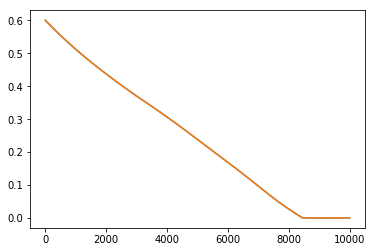

In [48]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [56]:
#list(enumerate(range(10)))

In [50]:
#print (rmse_a)

[0.60071594, 0.60061896, 0.6005219, 0.600425, 0.60032797, 0.60023105, 0.60013413, 0.6000372, 0.59994036, 0.59984356, 0.59974676, 0.59965, 0.5995532, 0.5994565, 0.59935975, 0.5992631, 0.5991664, 0.59906965, 0.59897304, 0.5988764, 0.59877986, 0.59868324, 0.59858674, 0.59849024, 0.59839374, 0.59829724, 0.5982008, 0.5981044, 0.598008, 0.5979116, 0.5978152, 0.5977189, 0.5976225, 0.5975263, 0.59743, 0.5973338, 0.5972376, 0.59714144, 0.5970452, 0.59694904, 0.59685296, 0.5967569, 0.5966608, 0.5965647, 0.5964687, 0.59637266, 0.5962767, 0.59618074, 0.59608483, 0.59598887, 0.595893, 0.5957972, 0.59570134, 0.59560555, 0.59550977, 0.59541404, 0.5953183, 0.5952226, 0.5951269, 0.59503126, 0.59493566, 0.59484005, 0.5947445, 0.5946489, 0.5945534, 0.59445786, 0.5943624, 0.5942669, 0.5941714, 0.594076, 0.59398067, 0.5938852, 0.5937898, 0.59369445, 0.5935992, 0.5935039, 0.5934086, 0.59331334, 0.5932181, 0.5931229, 0.5930277, 0.5929326, 0.59283745, 0.5927423, 0.59264725, 0.5925522, 0.5924571, 0.59236217, 0

In [51]:
print (rmse_a[-1])

4.656819e-06


In [52]:
print (pred_list[-1])

[[0.08270571 0.7409657  0.3664399 ]
 [0.08272947 0.740754   0.36599812]
 [0.08275279 0.74054205 0.36555213]
 [0.08277577 0.740327   0.36510906]]
